In [ ]:
import random

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import numpy as np

In [ ]:
class OneArmedBandit:

  def __init__(self, r, p):
    self.r = r
    self.p = p

  def game(self):
    return self.r if random.random() < self.p else 0


In [ ]:
bandit = OneArmedBandit(10, 1/5)

In [ ]:
for i in range(10):
  print(f"{i+1}-я попытка. Результат: {bandit.game()}")

1-я попытка. Результат: 0
2-я попытка. Результат: 0
3-я попытка. Результат: 0
4-я попытка. Результат: 0
5-я попытка. Результат: 0
6-я попытка. Результат: 0
7-я попытка. Результат: 10
8-я попытка. Результат: 0
9-я попытка. Результат: 0
10-я попытка. Результат: 10


In [ ]:
class MultiArmedBandit:

  def __init__(self, p, r):
    if len(p) != len(r):
      raise ValueError()
    self.badits = [OneArmedBandit(r_i, p_i) for r_i, p_i in zip(r, p)]

  def game(self, a):
    return self.badits[a].game()

In [ ]:
N = 10
r_bound = (0, 10)
p = [random.random() for _ in range(N)]
r = [random.randint(*r_bound) for _ in range(N)]
game = MultiArmedBandit(p, r)

In [ ]:
print(p)
print(r)

[0.3521940472139323, 0.04858085428488235, 0.8104231141877015, 0.5614421895425684, 0.07159820933247274, 0.7257231400768916, 0.9567794355730552, 0.9358899594170607, 0.5092708489144848, 0.3452403118468148]
[7, 2, 2, 3, 6, 0, 1, 4, 4, 10]


In [ ]:
print(np.round( np.array(p)*np.array(r), 2))

[2.47 0.1  1.62 1.68 0.43 0.   0.96 3.74 2.04 3.45]


In [ ]:
for i in range(10):
  a = random.randint(0, N-1)
  print(f"{i+1}-я попытка. Действие: {a}. Результат: {game.game(a)}")

1-я попытка. Действие: 9. Результат: 0
2-я попытка. Действие: 3. Результат: 3
3-я попытка. Действие: 3. Результат: 3
4-я попытка. Действие: 8. Результат: 0
5-я попытка. Действие: 5. Результат: 0
6-я попытка. Действие: 9. Результат: 10
7-я попытка. Действие: 4. Результат: 0
8-я попытка. Действие: 4. Результат: 0
9-я попытка. Действие: 8. Результат: 4
10-я попытка. Действие: 3. Результат: 0


In [ ]:
def greedy_strategy(N, T, env):
  P = [0 for _ in range(N)]
  Q = [0 for _ in range(N)]
  Rs = []
  As = []

  for t in range(T):
    a = max(enumerate(Q), key = lambda x: x[1])
    a = a[0]
    r = env.game(a)
    Rs.append(r)
    As.append(a)
    print(f"{t}-й шаг. Действие: {a}. Результат: {r}")
    P[a] += 1
    Q[a] = Q[a] + 1/P[a] * (r - Q[a])

  return Rs, As

In [ ]:
Rs, As = greedy_strategy(N, 1_000, game)

0-й шаг. Действие: 0. Результат: 0
1-й шаг. Действие: 0. Результат: 0
2-й шаг. Действие: 0. Результат: 0
3-й шаг. Действие: 0. Результат: 0
4-й шаг. Действие: 0. Результат: 0
5-й шаг. Действие: 0. Результат: 0
6-й шаг. Действие: 0. Результат: 0
7-й шаг. Действие: 0. Результат: 0
8-й шаг. Действие: 0. Результат: 7
9-й шаг. Действие: 0. Результат: 0
10-й шаг. Действие: 0. Результат: 0
11-й шаг. Действие: 0. Результат: 0
12-й шаг. Действие: 0. Результат: 0
13-й шаг. Действие: 0. Результат: 0
14-й шаг. Действие: 0. Результат: 0
15-й шаг. Действие: 0. Результат: 7
16-й шаг. Действие: 0. Результат: 0
17-й шаг. Действие: 0. Результат: 7
18-й шаг. Действие: 0. Результат: 7
19-й шаг. Действие: 0. Результат: 0
20-й шаг. Действие: 0. Результат: 7
21-й шаг. Действие: 0. Результат: 0
22-й шаг. Действие: 0. Результат: 7
23-й шаг. Действие: 0. Результат: 7
24-й шаг. Действие: 0. Результат: 0
25-й шаг. Действие: 0. Результат: 0
26-й шаг. Действие: 0. Результат: 0
27-й шаг. Действие: 0. Результат: 0
28

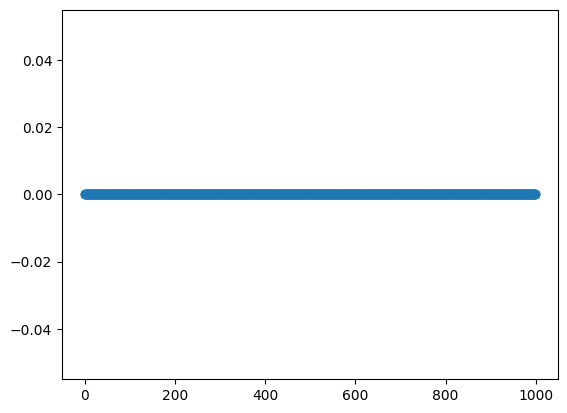

In [ ]:
plt.scatter(range(1_000), As)
plt.show()

In [ ]:
def e_greedy_strategy(eps, N, T, env):
  P = [0 for _ in range(N)]
  Q = [0 for _ in range(N)]
  Rs = []
  As = []

  for t in range(T):
    alpha = random.random()
    a = None
    if alpha < eps:
      a = random.randint(0, N-1)
    else:
      a = max(enumerate(Q), key = lambda x: x[1])
      a = a[0]
    r = env.game(a)
    Rs.append(r)
    As.append(a)
    print(Q)
    print(f"{t}-й шаг. Действие: {a}. Результат: {r}")
    P[a] += 1
    Q[a] = Q[a] + 1/P[a] * (r - Q[a])

  return Rs, As


In [ ]:
Rs, As = e_greedy_strategy(1/10,N, 1_000, game)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
0-й шаг. Действие: 0. Результат: 7
[7.0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
1-й шаг. Действие: 0. Результат: 0
[3.5, 0, 0, 0, 0, 0, 0, 0, 0, 0]
2-й шаг. Действие: 0. Результат: 7
[4.666666666666666, 0, 0, 0, 0, 0, 0, 0, 0, 0]
3-й шаг. Действие: 0. Результат: 0
[3.4999999999999996, 0, 0, 0, 0, 0, 0, 0, 0, 0]
4-й шаг. Действие: 0. Результат: 7
[4.199999999999999, 0, 0, 0, 0, 0, 0, 0, 0, 0]
5-й шаг. Действие: 0. Результат: 7
[4.666666666666666, 0, 0, 0, 0, 0, 0, 0, 0, 0]
6-й шаг. Действие: 0. Результат: 0
[3.9999999999999996, 0, 0, 0, 0, 0, 0, 0, 0, 0]
7-й шаг. Действие: 0. Результат: 7
[4.375, 0, 0, 0, 0, 0, 0, 0, 0, 0]
8-й шаг. Действие: 0. Результат: 0
[3.888888888888889, 0, 0, 0, 0, 0, 0, 0, 0, 0]
9-й шаг. Действие: 0. Результат: 7
[4.2, 0, 0, 0, 0, 0, 0, 0, 0, 0]
10-й шаг. Действие: 8. Результат: 0
[4.2, 0, 0, 0, 0, 0, 0, 0, 0.0, 0]
11-й шаг. Действие: 0. Результат: 0
[3.8181818181818183, 0, 0, 0, 0, 0, 0, 0, 0.0, 0]
12-й шаг. Действие: 0. Результат: 7
[4.08333

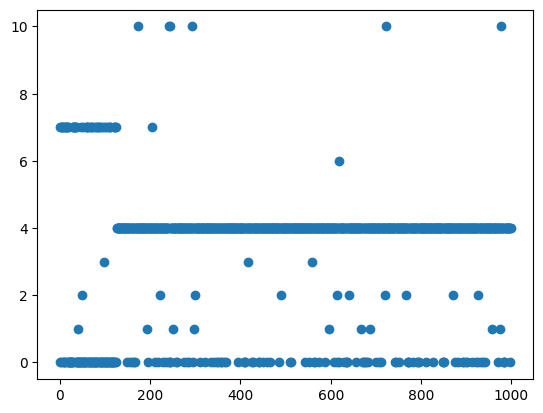

In [ ]:
plt.scatter(range(1_000), Rs)
plt.show()

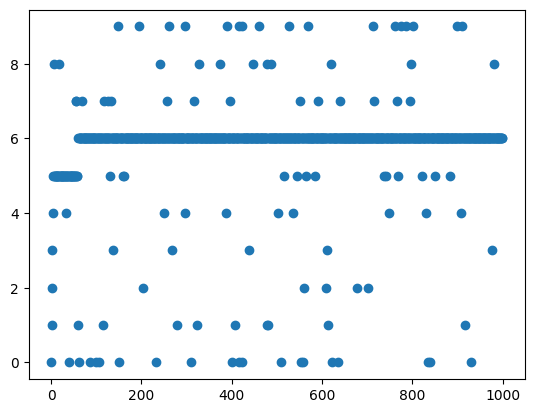

In [ ]:
plt.scatter(range(1_000), As)
plt.show()